### Importing libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

### Importing data

In [33]:
digits0 = datasets.load_digits()
digits = pd.DataFrame(digits0.data)
digits["y"] = digits0.target
digits.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Visualizing data


<Figure size 720x1440 with 0 Axes>

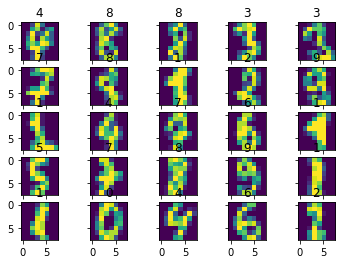

In [4]:
# Dimensions du jeu de données
n, p = tuple(digits.shape)
# Indices sous forme de matrice 5*5
indices = np.random.choice(range(n), size=25, replace=False).reshape((5, 5))
# Figure
plt.figure(figsize = (10, 20))
fig, axs = plt.subplots(nrows=5, ncols=5, sharex='col', sharey='row')
for i in range(5):
    for j in range(5):
        axs[i, j].imshow(digits0.images[indices[i, j]])
        axs[i, j].set_title(digits0.target[indices[i, j]])
plt.show()

### Dimension reduction

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_digits = digits0.data
y_digits = digits0.target

lda = LinearDiscriminantAnalysis(n_components=2)

X_digits_reduced = lda.fit(X_digits, y_digits).transform(X_digits)

### Reduced data visualization

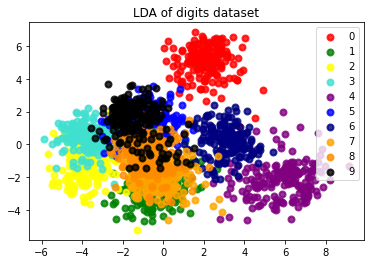

In [17]:
plt.figure()

colors = ["red", "green", "yellow", "turquoise", "purple", "blue", "navy", "orange", "darkorange", "black"]

for color, i, target_name in zip(colors, range(10), digits0.target_names):
    plt.scatter(X_digits_reduced[y_digits == i, 0], X_digits_reduced[y_digits == i, 1], color=color, alpha=0.8, lw=2, label=target_name)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of digits dataset")

plt.show()

#### Après application de l'analyse factorielle discriminante, on constate que les classes les plus facilement distincibles les unes des autres sont  '0', '4' et '2'. Les classes moins distincibles les unes des autres sont '7', '8' et '1' puis '9' et '5'

## KNN


In [34]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(digits.drop('y', axis=1), digits['y'], test_size=0.2, random_state=42)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [45]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(train_X, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [46]:
print(grid_search.best_params_)

{'n_neighbors': 1}


Text(0, 0.5, 'Cross-Validated Accuracy')

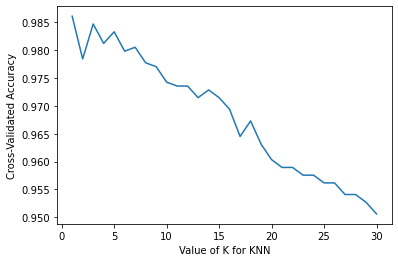

In [47]:
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [65]:
from sklearn.metrics import accuracy_score

#Fitting the knn with training data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X, train_y)

#Prediction of knn over test data
y_predict=knn.predict(test_X) 

#Computing the accuracy
test_accuracy=accuracy_score(test_y,y_predict)*100

print("Accuracy for our testing dataset with is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with is : 98.33%
